# DATA SCIENCE VIRTUAL INTERNSHIP PROGRAM-LETS GROW MORE

# INTERMEDIATE TASK-2:Prediction using Decision Tree Algorithm

In [5]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Loading the dataset
dataset = sns.load_dataset('iris')
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
# Handling missing values if any
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [39]:
value_count = dataset['species'].value_counts()
value_count

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

There are no null values

Text(0.5, 1.0, 'petal_width distribution')

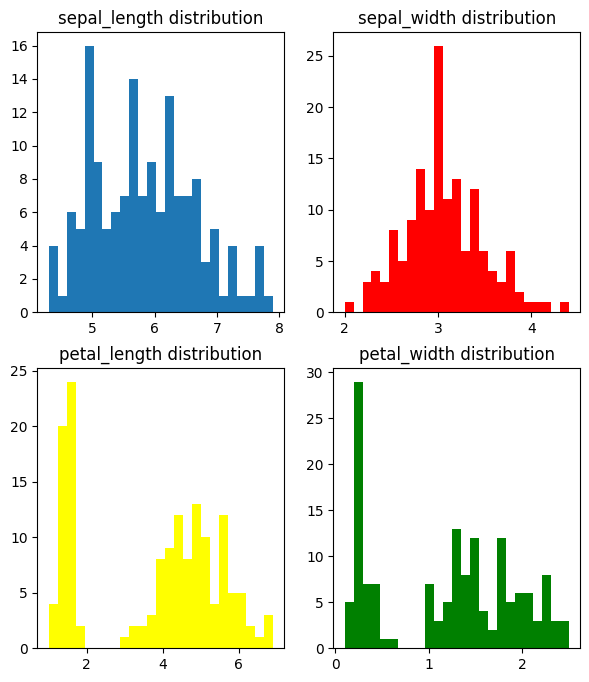

In [42]:
# visual representation of distribution of independent values in dataset
#---for subplots---
#sepal_length 
plt.figure(figsize=(7,8))
plt.subplot(2,2,1)
plt.hist(dataset['sepal_length'],bins=25)
plt.title('sepal_length distribution')


#sepal_width
plt.subplot(2,2,2)
plt.hist(dataset['sepal_width'],bins=25,color='red')
plt.title('sepal_width distribution')

#petal_length
plt.subplot(2,2,3)
plt.hist(dataset['petal_length'],bins=25,color='yellow')
plt.title('petal_length distribution')

#petal_width
plt.subplot(2,2,4)
plt.hist(dataset['petal_width'],bins=25,color='green')
plt.title('petal_width distribution')



In [87]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


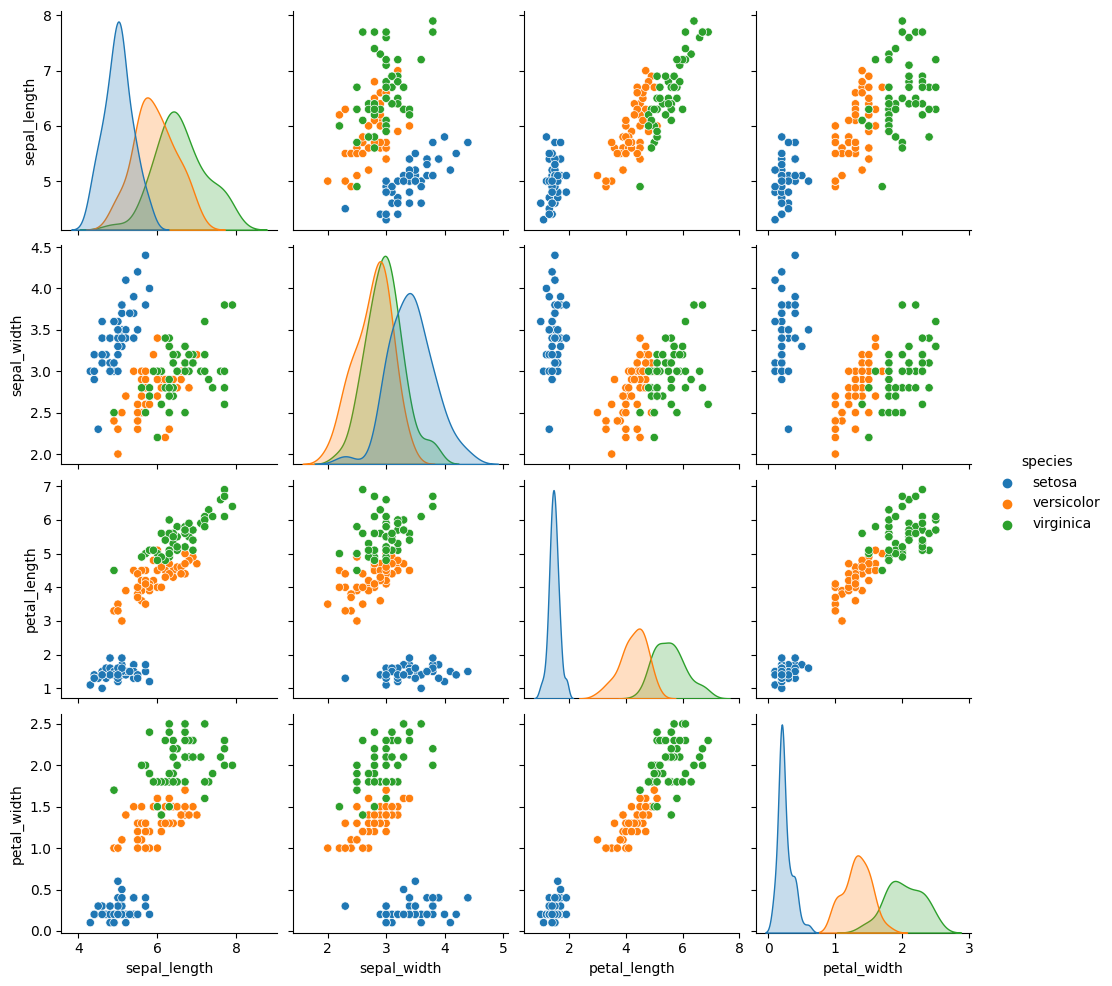

In [40]:
sns.pairplot(data=dataset,hue='species')

In [43]:
# Assigning x and y values for training and testing
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [44]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [47]:
# dividing the dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
# Training data = 80% and testing data = 20%

In [48]:
# performing scaling operation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')

In [52]:
classifier.fit(x_train,y_train)# model is trained by training data

DecisionTreeClassifier(criterion='entropy')

# DECISION TREE VISUALIZATION

[Text(0.3333333333333333, 0.9285714285714286, 'petal_length <= -0.572\nentropy = 1.57\nsamples = 120\nvalue = [44, 44, 32]\nclass = setosa'),
 Text(0.2222222222222222, 0.7857142857142857, 'entropy = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(0.4444444444444444, 0.7857142857142857, 'petal_length <= 0.663\nentropy = 0.982\nsamples = 76\nvalue = [0, 44, 32]\nclass = versicolor'),
 Text(0.3333333333333333, 0.6428571428571429, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]\nclass = versicolor'),
 Text(0.5555555555555556, 0.6428571428571429, 'petal_length <= 0.893\nentropy = 0.571\nsamples = 37\nvalue = [0, 5, 32]\nclass = virginica'),
 Text(0.4444444444444444, 0.5, 'petal_width <= 0.834\nentropy = 0.94\nsamples = 14\nvalue = [0, 5, 9]\nclass = virginica'),
 Text(0.2222222222222222, 0.35714285714285715, 'sepal_width <= -1.687\nentropy = 0.722\nsamples = 5\nvalue = [0, 4, 1]\nclass = versicolor'),
 Text(0.1111111111111111, 0.21428571428571427, 'entropy = 0.0\nsamples = 1

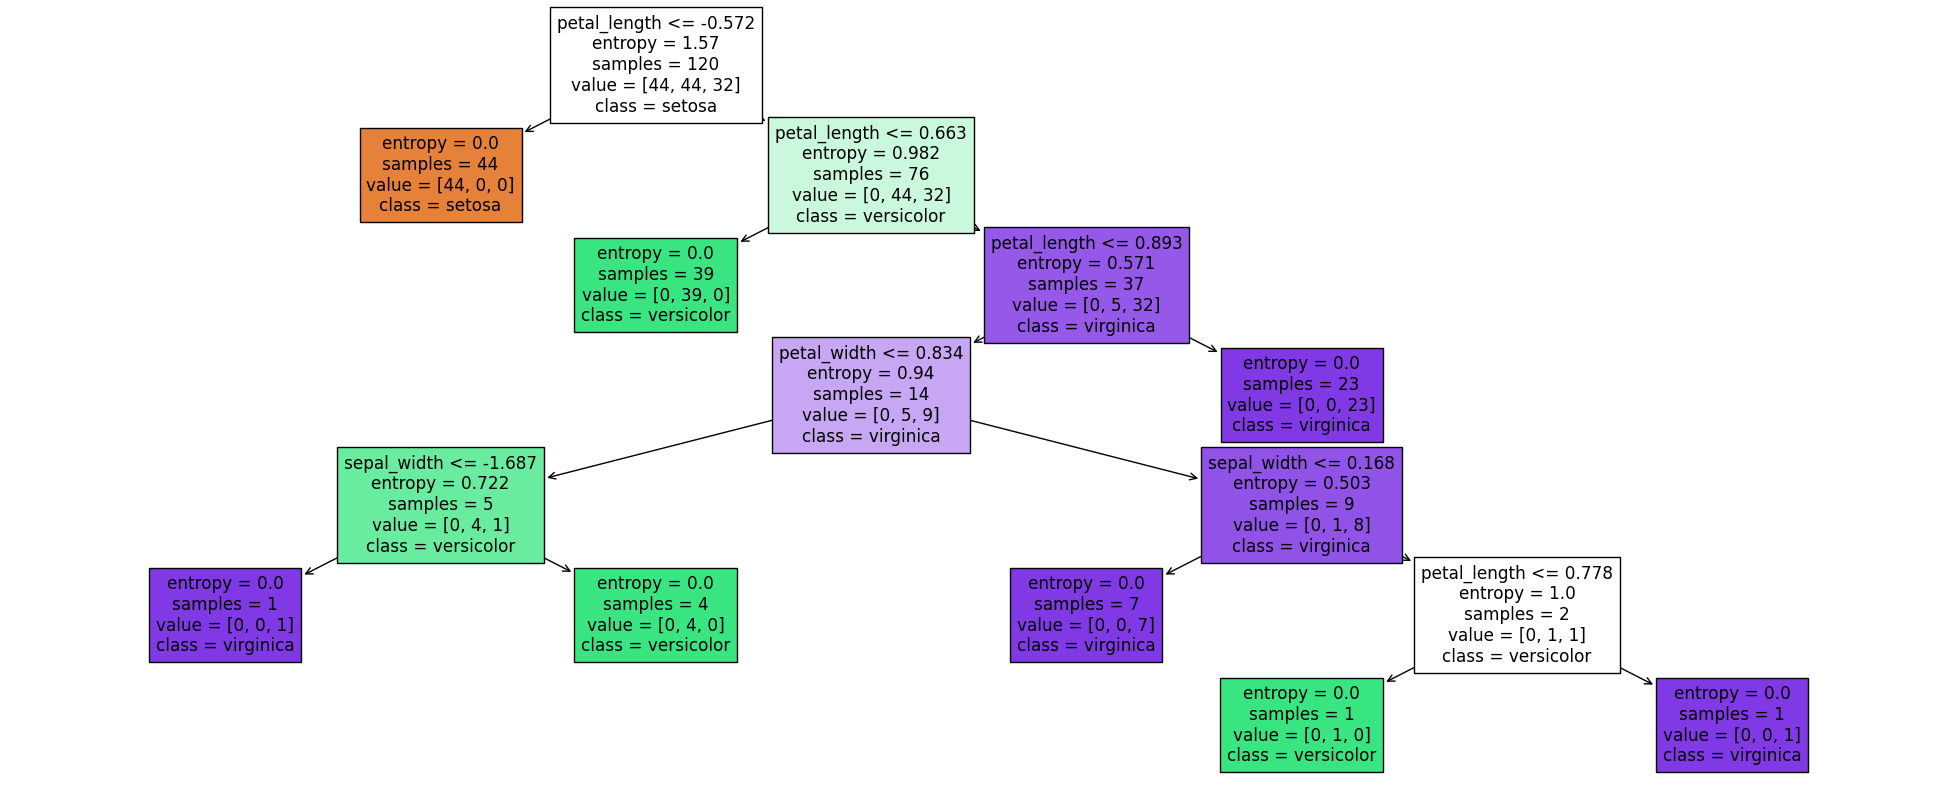

In [90]:
from sklearn import tree

target_list = dataset['species'].unique().tolist()
feature_list = dataset.columns.tolist()

fig = plt.figure(figsize=(25,10))
tree.plot_tree(classifier,feature_names=feature_list,class_names=target_list,filled=True)

Hence Decision tree is visualized

In [67]:
y_test_pred = classifier.predict(x_test)
y_test_pred

array(['virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [68]:
y_test

100     virginica
132     virginica
108     virginica
67     versicolor
21         setosa
148     virginica
5          setosa
121     virginica
16         setosa
106     virginica
9          setosa
133     virginica
124     virginica
79     versicolor
98     versicolor
123     virginica
118     virginica
149     virginica
135     virginica
104     virginica
113     virginica
130     virginica
2          setosa
103     virginica
59     versicolor
43         setosa
101     virginica
131     virginica
53     versicolor
76     versicolor
Name: species, dtype: object

# Measuring accuracy

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.9333333333333333

# USING SOME INPUT_SAMPLE

In [78]:
input_sample =(3.2,3.3,5.2,2.0)

In [79]:
input_sample=np.asarray(input_sample)

In [80]:
input_sample=input_sample.reshape(1,-1)

In [86]:
data = sc .transform(input_sample)
data

C:\Users\Nikhileswari Puvvula\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-3.2137992 ,  0.51603381,  0.92166103,  1.16501353]])

In [82]:
prediction = classifier.predict(data)

In [83]:
prediction

array(['virginica'], dtype=object)

In [84]:
print("The species of Iris is :",prediction[0])

The species of Iris is : virginica


Hence if we feed any new data to this classifier , it would be able to predict the right class accordingly as shown above

# CONCLUSION :

Hence Iris flowers are classified into setosa or virginica or versicolor species with an accuracy of 93%(approx) using DECISION TREE machine learning model